In [35]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [36]:
stock_prices = pd.read_csv('Outputs/stock_data_closings.csv')
stock_prices.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MMM,MRK,MSFT,NKE,TRV,UNH,V,VZ,WBA,WMT
0,173.771469,220.185318,177.348404,200.240005,196.947128,232.630005,53.863472,126.763741,142.970001,56.841930,...,159.266953,78.942360,308.093109,146.496033,162.697205,466.594452,224.472000,50.284931,47.559608,137.646301
1,173.602448,221.678162,181.017258,208.339996,200.650421,232.119995,53.573200,130.103439,144.490005,58.821365,...,160.619583,79.368645,305.893738,146.644440,164.469284,462.487061,230.615524,50.256592,47.550053,138.729279
2,174.825348,221.920502,181.628754,207.520004,200.249786,225.009995,54.347240,130.701904,142.619995,58.678612,...,159.880936,79.455841,310.550049,147.129257,169.100128,473.713287,233.652557,50.823395,48.180870,138.670212
3,171.902313,217.180222,181.510376,206.389999,195.999329,212.770004,53.408722,129.533966,140.029999,58.250370,...,157.703247,76.549278,298.453430,143.765366,168.463776,482.589600,229.801666,50.813950,47.311104,138.808044
4,171.613632,215.309326,183.295532,206.449997,193.869247,219.229996,53.360344,131.155533,142.020004,57.669865,...,154.192108,76.113297,303.099915,143.844513,168.297318,477.060425,226.675323,50.360504,46.450905,137.173737


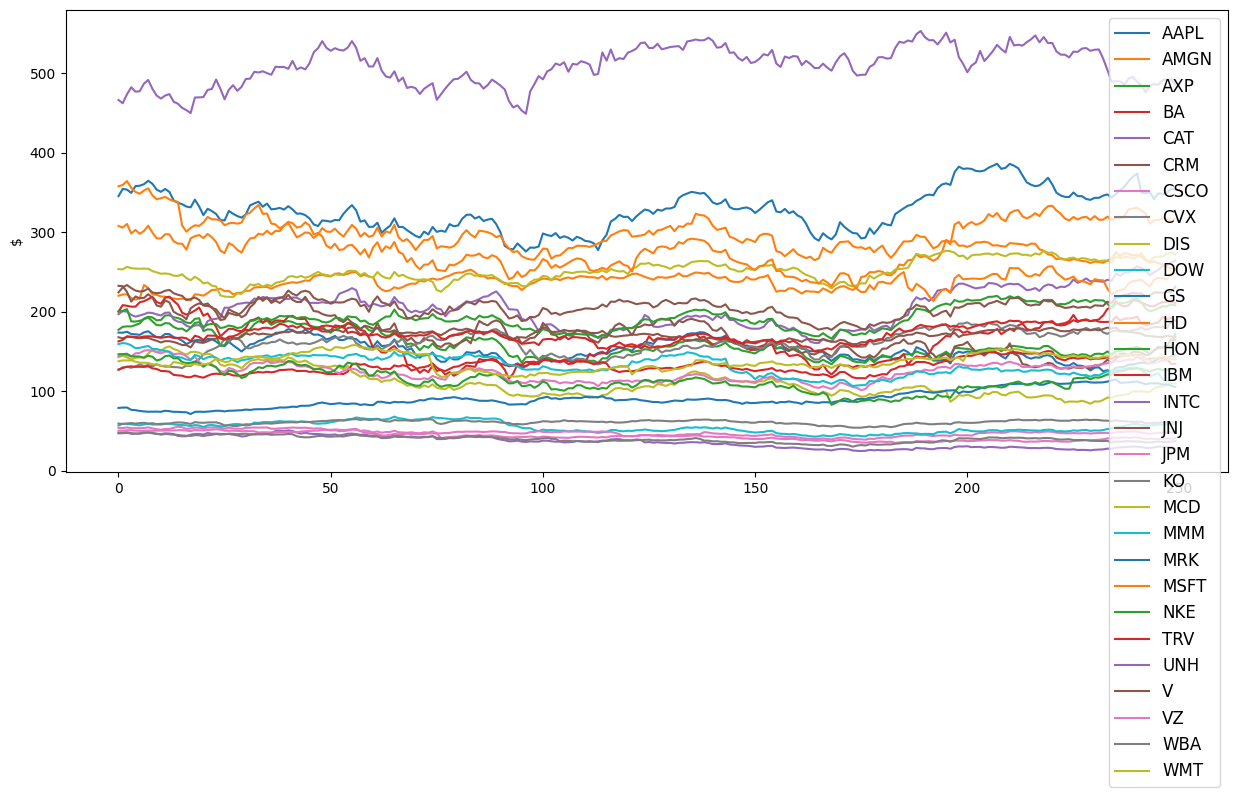

In [37]:
# Visualizing the data
plt.figure(figsize=(15, 6))
for i in range(stock_prices.shape[1]):
    plt.plot(stock_prices.iloc[:,i], label=stock_prices.columns.values[i])
plt.legend(loc='best', fontsize=12)
plt.ylabel('$')
plt.show()

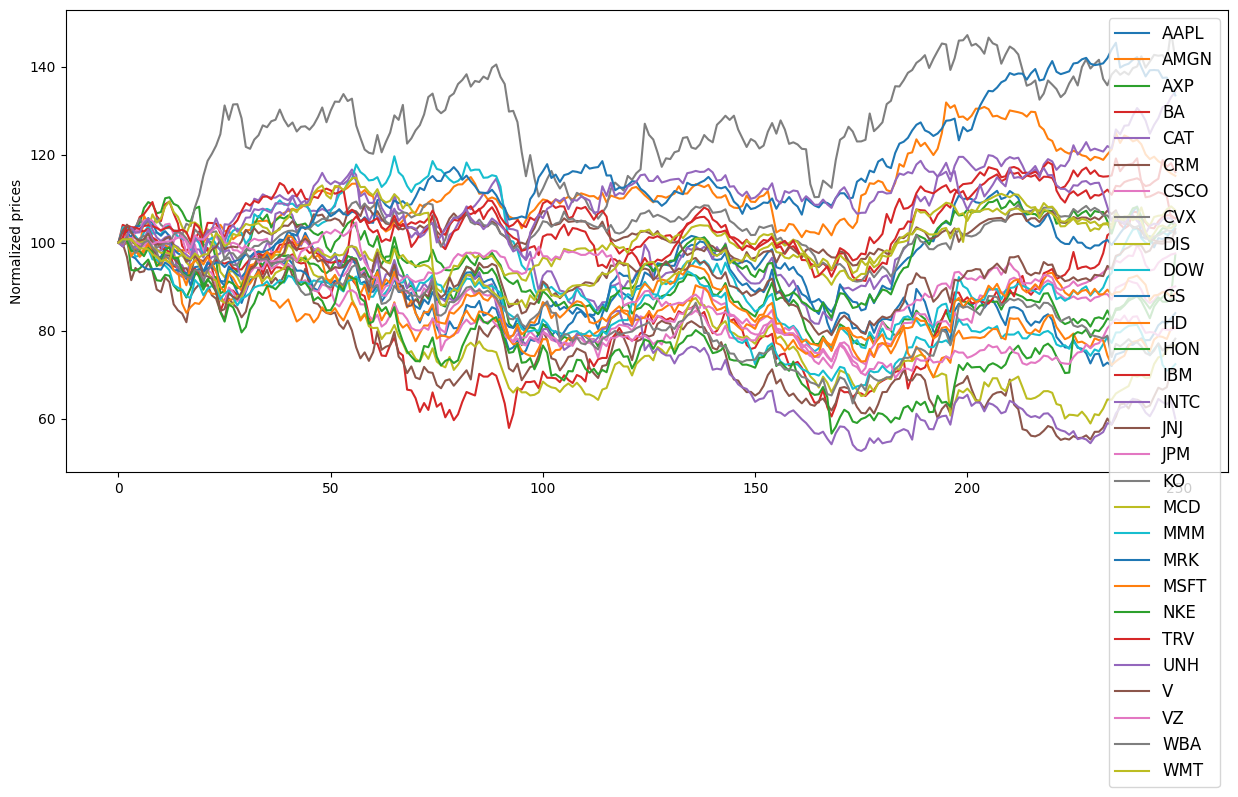

In [38]:
# Normalizing values to Jan 27/2022 (100%)

stock_normalized = stock_prices / (stock_prices.iloc[0]) * 100

plt.figure(figsize=(15, 6))
for i in range(stock_normalized.shape[1]):
    plt.plot(stock_normalized.iloc[:,i], label=stock_normalized.columns.values[i])
plt.legend(loc='best', fontsize=12)
plt.ylabel('Normalized prices')
plt.show()

In [39]:
#Calculate daily percentual change in the value
stock_pct = stock_prices.pct_change()
stock_pct.head()


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MMM,MRK,MSFT,NKE,TRV,UNH,V,VZ,WBA,WMT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.000973,0.006780,0.020687,0.040451,0.018803,-0.002192,-0.005389,0.026346,0.010632,0.034824,...,0.008493,0.005400,-0.007139,0.001013,0.010892,-0.008803,0.027369,-0.000564,-0.000201,0.007868
2,0.007044,0.001093,0.003378,-0.003936,-0.001997,-0.030631,0.014448,0.004600,-0.012942,-0.002427,...,-0.004599,0.001099,0.015222,0.003306,0.028156,0.024274,0.013169,0.011278,0.013266,-0.000426
3,-0.016720,-0.021360,-0.000652,-0.005445,-0.021226,-0.054398,-0.017269,-0.008936,-0.018160,-0.007298,...,-0.013621,-0.036581,-0.038952,-0.022864,-0.003763,0.018738,-0.016481,-0.000186,-0.018052,0.000994
4,-0.001679,-0.008614,0.009835,0.000291,-0.010868,0.030361,-0.000906,0.012518,0.014211,-0.009966,...,-0.022264,-0.005695,0.015569,0.000551,-0.000988,-0.011457,-0.013605,-0.008924,-0.018182,-0.011774


In [40]:
#Remove nan values at the first row of df2. Create a new dataframe df
stock_pct_clean = stock_pct.iloc[1:len(stock_pct.index),:]

# Calculate annualized average return for each stock. Annualized average return = Daily average return * 252 business days.

annual_return = stock_pct_clean.mean()*252
annual_return.head()


AAPL   -0.114737
AMGN    0.167048
AXP     0.035483
BA      0.160405
CAT     0.352928
dtype: float64

In [41]:
# Create a covariance matrix
stock_covar = stock_pct_clean.cov()
stock_covar.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MMM,MRK,MSFT,NKE,TRV,UNH,V,VZ,WBA,WMT
AAPL,0.000494,0.000092,0.000338,0.000347,0.000211,0.000449,0.000262,0.000153,0.000338,0.000214,...,0.000208,0.000077,0.000404,0.000411,0.000117,0.000161,0.000285,0.000108,0.000237,0.000131
AMGN,0.000092,0.000191,0.000096,0.000058,0.000084,0.000056,0.000080,0.000027,0.000056,0.000076,...,0.000103,0.000076,0.000082,0.000084,0.000074,0.000084,0.000077,0.000067,0.000105,0.000055
AXP,0.000338,0.000096,0.000515,0.000387,0.000262,0.000372,0.000236,0.000116,0.000335,0.000262,...,0.000215,0.000055,0.000323,0.000374,0.000149,0.000139,0.000304,0.000096,0.000231,0.000106
BA,0.000347,0.000058,0.000387,0.000845,0.000305,0.000389,0.000215,0.000149,0.000373,0.000254,...,0.000188,0.000041,0.000321,0.000406,0.000109,0.000117,0.000259,0.000088,0.000233,0.000081
CAT,0.000211,0.000084,0.000262,0.000305,0.000433,0.000226,0.000159,0.000268,0.000226,0.000273,...,0.000187,0.000063,0.000205,0.000287,0.000151,0.000093,0.000193,0.000079,0.000205,0.000071


In [47]:
# Create a correlation matrix
stock_corr = stock_pct_clean.corr()
stock_corr.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MMM,MRK,MSFT,NKE,TRV,UNH,V,VZ,WBA,WMT
AAPL,1.000000,0.299332,0.670853,0.537105,0.456115,0.682227,0.641085,0.327259,0.651528,0.506176,...,0.522953,0.270937,0.814679,0.694692,0.360014,0.472022,0.700123,0.338287,0.546756,0.348419
AMGN,0.299332,1.000000,0.304387,0.143672,0.291829,0.137515,0.314616,0.093937,0.173446,0.288528,...,0.416366,0.431261,0.266857,0.228372,0.365684,0.397428,0.302674,0.336841,0.389525,0.233661
AXP,0.670853,0.304387,1.000000,0.586609,0.555082,0.553385,0.564544,0.242744,0.632492,0.607412,...,0.528076,0.190579,0.636835,0.618971,0.450847,0.399168,0.730362,0.294757,0.523231,0.276148
BA,0.537105,0.143672,0.586609,1.000000,0.505385,0.452146,0.401399,0.243882,0.550051,0.459112,...,0.361305,0.111844,0.494672,0.525052,0.255719,0.262072,0.485600,0.211802,0.412080,0.165221
CAT,0.456115,0.291829,0.555082,0.505385,1.000000,0.367141,0.414731,0.613480,0.465330,0.691065,...,0.501995,0.238855,0.441261,0.519209,0.497947,0.290633,0.506879,0.266704,0.506016,0.203544


In [94]:
# Selecting the 3 stocks with the highest rate of return

highest_stocks = annual_return.sort_values(ascending=False).iloc[0:3,]
highest_stocks_index = highest_stocks.index.to_list()
print(highest_stocks_index)

# Extracting the information from all the previous datasets for only these companies

stock_prices_reduced = stock_prices.loc[:,highest_stocks_index[0:3]]
stock_pct_reduced = stock_pct_clean.loc[:,highest_stocks_index[0:3]]

# @NOTE: another way to do it
# stock_prices_reduced = stock_prices[highest_stocks_index[0:3]]

['CVX', 'CAT', 'MRK']


,CVX,CAT,MRK
1,0.026346,0.018803,0.005400
2,0.004600,-0.001997,0.001099
3,-0.008936,-0.021226,-0.036581
4,0.012518,-0.010868,-0.005695
5,0.019650,0.007106,-0.012474
...,...,...,...
245,-0.001327,0.011974,-0.000546
246,0.000941,0.019430,-0.012377
247,-0.009678,0.003222,0.000645
248,0.048637,0.014239,-0.015839


In [97]:
# Calculating the standard deviation of each one of these stocks
stocks_reduced_stdev = stock_pct_reduced.std()
stocks_reduced_stdev


CVX    0.021002
CAT    0.020797
MRK    0.012752
dtype: float64

In [128]:
# Fetching the data for Dow Jones and S&P500 and comparing to the 3 tops stocks in Dow Jones


# Normalizing values to Jan 27/2022 (100%)
indices_normalized = indices / (indices.iloc[0]) * 100
